In [1]:
from model import FFNet, tv_model
from learning import Learn, Selector
from dataset import SKDS, TVDS, CDataset

from torch.optim import Adam
from torch.nn import MSELoss, CrossEntropyLoss
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import transforms


In [2]:
import numpy as np

class Dummy(CDataset):
    
    def load_data(self, boom='bust'):
        data = {1: (np.asarray([1,2,3,4]), np.asarray(100), ['apple','dog']),
                2: (np.asarray([5,6,7,8]), np.asarray(200), ['orange','cat'])}
        print(boom)
        return data
    
ds_params = {'train_params': {'embed': [('fruit',2,8,False,False),
                                        ('pet',2,8,False,False)],
                              'embed_lookup': {'fruit': {'apple': 1,
                                                         'orange': 2},
                                               'pet': {'dog': 1,
                                                       'cat': 2}},
             'boom': 'bang'}}
    
d = Dummy(**ds_params['train_params'])
d[1]           

bang
CDataset created...


(tensor([1., 2., 3., 4.]),
 tensor(100., dtype=torch.float64),
 [tensor(1), tensor(1)])

SKDS created...
epoch: 0 of 100, train loss: 6507.238717538339, val loss: 1357.4035278320312, lr: 0.01
epoch: 10 of 100, train loss: 479.44840438277635, val loss: 481.3867553710937, lr: 0.01
epoch: 20 of 100, train loss: 406.11473592122394, val loss: 363.0885375976562, lr: 0.005
epoch: 30 of 100, train loss: 398.69597880045575, val loss: 325.9255065917969, lr: 0.005
epoch: 40 of 100, train loss: 379.68878060800057, val loss: 380.88654174804685, lr: 0.0025
epoch: 50 of 100, train loss: 364.4590889259621, val loss: 445.1833160400391, lr: 0.00125
epoch: 60 of 100, train loss: 359.59627617730035, val loss: 366.9523681640625, lr: 0.000625
epoch: 70 of 100, train loss: 357.6495649549696, val loss: 413.36528930664065, lr: 0.0003125
epoch: 80 of 100, train loss: 323.80602462203416, val loss: 286.6304016113281, lr: 0.00015625
epoch: 90 of 100, train loss: 408.26786239058885, val loss: 305.8154663085937, lr: 0.00015625
test loss: 276.187494913737
y_pred:
tensor([[-163.1417],
        [  -1.7230],

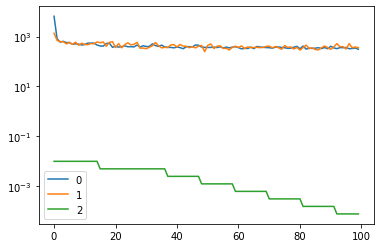

learning time: 0:00:55.124401


In [3]:
model_params = {'D_in': 128, 
                'H': 512, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'train_params': {'embed': [],
                              'make': 'make_regression',
                              'transform': None,
                              'target_transform': None,
                              'sk_params': {'n_samples': 10000,
                                            'n_features': 128}}}
             
                           
             
opt_params = {'lr': 0.01}
crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}
sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 5}


l = Learn([SKDS], FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=MSELoss,
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=256, epochs=100)

TVDS created...
TVDS created...
epoch: 0 of 2, train loss: 0.2980682936726759, val loss: 0.055606227422900056, lr: 0.01
epoch: 1 of 2, train loss: 0.06183050608014067, val loss: 0.04848414618661378, lr: 0.01
test loss: 0.03248376444982777
y_pred:
tensor([[-3.1822e+00,  1.1249e+01, -1.0455e+00, -4.5416e+00,  2.3559e+00,
         -4.7361e+00, -2.2952e+00,  3.5110e+00, -9.6372e-01, -1.1973e+00],
        [-2.1462e+00, -2.5566e+00,  8.9515e+00,  4.7284e-01, -2.1628e+00,
         -2.9643e+00, -3.8087e+00,  3.8668e+00,  4.7313e-01, -1.7498e+00],
        [-9.2835e+00, -1.9474e+00, -4.5984e-01,  1.1728e+01, -3.7824e+00,
          4.5517e-01, -7.0206e+00, -8.8633e-01,  3.1484e+00,  7.7841e-02],
        [-8.7332e+00, -8.0295e-01, -3.9971e+00, -1.8151e+00,  1.2517e+01,
         -4.0822e+00, -4.0677e+00,  3.1170e+00, -1.6842e+00,  3.7175e+00],
        [-2.5002e+00, -7.5262e+00, -4.1446e+00,  4.5828e+00, -7.2022e+00,
          1.6080e+01, -2.4318e+00, -5.6387e+00,  1.6599e+00,  1.7998e+00],
        

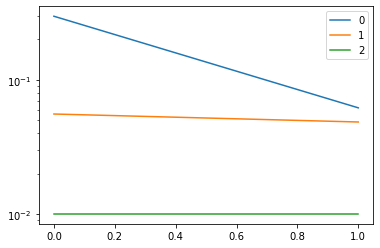

learning time: 0:04:04.251463


In [4]:
model_params = {'model_name': 'resnet18',
                'in_channels': 1,
                'tv_params': {'num_classes': 10}}

ds_params={'train_params': {'embed': [],
                            'dataset': 'MNIST',
                            'tv_params': {'root': './data/',
                                          'train': True,
                                          'download': True,
                                          'transform': transforms.Compose([
                                                           transforms.Resize(224),
                                                           transforms.ToTensor()]),
                                          'target_transform': None}},
           'test_params': {'embed': [],
                           'dataset': 'MNIST',
                           'tv_params': {'root': './data/',
                                         'train': False,
                                         'download': True,
                                         'transform': transforms.Compose([
                                                         transforms.Resize(224),
                                                         transforms.ToTensor()]),
                                         'target_transform': None}}}
        
opt_params = {'lr': 0.01}
crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.8,.2)}
sched_params = {'factor': .5,
                'patience': 1,
                'cooldown': 1}

l = Learn([TVDS,TVDS], tv_model, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=CrossEntropyLoss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=64, epochs=2)